y = -0.1x + 3.9


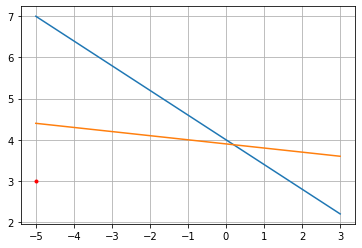

In [211]:
# Linear Regression::Absolute Trick Quiz 1
import matplotlib.pyplot as plt
import numpy as np

p, q = -5, 3

def get_line_coords(p, alpha=0.1):
    # orginal eq: y = -0.6x + 4
    return (-0.6 - (p * alpha)), (4 - alpha)

w1, w2 = get_line_coords(p)

print(f"y = {round(w1, 1)}x + {w2}")

x = np.linspace(-5, 3, 100)

y_orig = -0.6 * x + 4
plt.plot(x, y_orig)

y_new = round(w1, 1) * x + w2
plt.plot(x, y_new)

plt.plot([p], [q], marker='o', markersize=3, color="red")

plt.grid()

plt.show()

y = -0.4x + 3.96


<IPython.core.display.Javascript object>


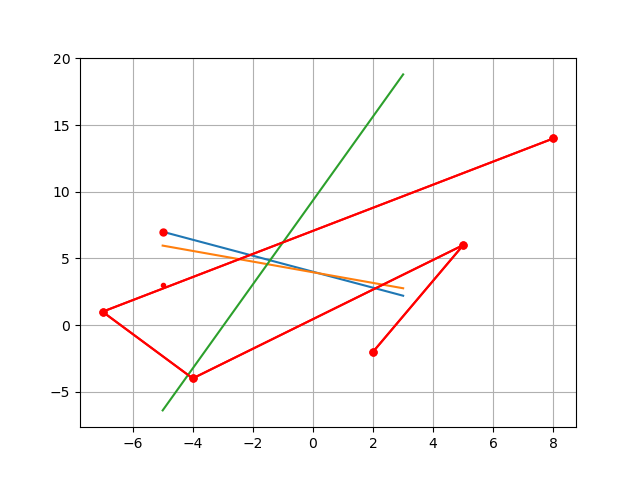

In [276]:
# Linear Regression::Square Trick Quiz 1
import matplotlib.pyplot as plt
import numpy as np

p, q = -5, 3

def get_line_coords(p, q, alpha=0.01):
    # orginal eq: y = -0.6x + 4 and to get q_prime, we'll have to solve it for y
    q_prime = -0.6 * p + 4

    # q - q' where q is the y coord of point and q' is the y coord of the line.
    q_diff = q - q_prime

    return (-0.6 + (p * alpha * q_diff)), (4 + (alpha * q_diff))

w1, w2 = get_line_coords(p, q) 

print(f"y = {round(w1, 1)}x + {w2}")

x = np.linspace(-5, 3, 100)

y_orig = -0.6 * x + 4
plt.plot(x, y_orig)

y_new = round(w1, 1) * x + w2
plt.plot(x, y_new)

plt.plot([p], [q], marker='o', markersize=3, color="red")

# Just a quick representation of where the q' will lie.
plt.plot([p], [-0.6 * p + 4], marker='o', markersize=5, color="red")

plt.grid()

plt.show()

In [294]:
# Linear Regression::Error Functions::Mean absolute error
points_list = [(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)]

line_coord_x, line_coord_y = (1.2, 2)

sum_of_error = 0

def get_y_prime(x):
    return line_coord_x * x + line_coord_y

for x_point, y_point in points_list:
    y_prime = get_y_prime(x_point)
    
    sum_of_error += abs(y_point - y_prime)
    
error = sum_of_error / len(points_list)

print(round(error, 2))

3.88


In [136]:
# Linear Regression::Error Functions::Mean squared error
points_list = [(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)]

line_coord_x, line_coord_y = (1.2, 2)

sum_of_error = 0

def get_y_prime(x):
    return line_coord_x * x + line_coord_y

for x_point, y_point in points_list:
    y_prime = get_y_prime(x_point)
    
    sum_of_error += (y_point - y_prime) ** 2
    
error = sum_of_error / (2 * len(points_list))

print(round(error, 2))

10.69


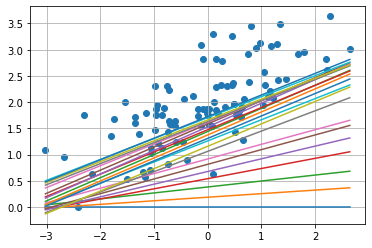

In [235]:
# Programming Quiz for "Mini-Batch Gradient Descent" personal implementation
import numpy as np

np.random.seed(70)

def get_dummy_data():
    return np.loadtxt('data/data.csv', delimiter=',')

def calc_mean_squared_error_for_batch(weight, x_coords, y_coords, bias, learning_rate=0.005):
    """
    Main equation is y = w1x + w2 or y_prime = weights * x_coord + bias
    
    y_diff = w1 + (alpha * (y - y_prime) * p) + (w2 + (alpha * (y - y_prime)))
    """
    y_pred = (x_coords @ weight) + bias

    error = y_coords - y_pred
    
    w_new, b_new = weight + (learning_rate * (error @ x_coords)), bias + (error.sum() * learning_rate)
    
    return w_new, b_new


def run_batch_gradient_descent(x_coord_list, y_coord_list, learning_rate=0.001, batch_size=20, epochs = 20):
    total_points = x_coord_list.shape[0]
    
    result = []
    
    w = np.zeros(1)
    
    b = 0
    
    result.append( np.hstack((w, b)) )

    for _ in range(epochs):
        batch = np.random.choice(range(total_points), batch_size)
    
        x_coords = x_coord_list[batch,:]
    
        y_coords = y_coord_list[batch]

        w, b = calc_mean_squared_error_for_batch(w, x_coords, y_coords, b)
        
        result.append( np.hstack((w, b)) )
    
    return result


dummy_data = get_dummy_data()


x_coords = dummy_data[:, :-1]
y_coords = dummy_data[:, -1]

x_min = x_coords.min()
x_max = x_coords.max()

batch_gd_result = run_batch_gradient_descent(x_coords, y_coords)

plt.scatter(x_coords, y_coords)

for w, b in batch_gd_result:
    change = w + b
    
    plt.plot([x_min, x_max], [x_min * w + b, x_max * w + b])

plt.grid()

plt.show()

In [283]:
# Linear regression using scikit

from sklearn.linear_model import LinearRegression
import pandas as ps

bmi_life_data = ps.read_csv('data/bmi_and_life_expectancy.csv')

bmi_life_model = LinearRegression()

bmi_life_model.fit(bmi_life_data[["BMI"]], bmi_life_data[["Life expectancy"]])

laos_life_exp = bmi_life_model.predict([[30]])

array([[82.78222151]])

In [288]:
# Programming Quiz: Multiple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
boston_data = load_boston()

x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and assign it to the model variable
model = LinearRegression()

model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]

# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)

prediction

array([23.68284712])

In [313]:
# Programming Quiz for "Polynomial Regression"

import numpy as np
import pandas as ps
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Assign the data to predictor and outcome variables

train_data = ps.read_csv('data/polynomial_regression.csv')

X = train_data['Var_X'].values.reshape(20, 1)
y = train_data['Var_Y'].values

# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature
poly_feat = PolynomialFeatures(degree=4)

X_poly = poly_feat.fit_transform(X)

# # Make and fit the polynomial regression model
# # TODO: Create a LinearRegression object and fit it to the polynomial predictor
# # features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)

# Once you've completed all of the steps, select Test Run to see your model
# predictions against the data, or select Submit Answer to check if the degree
# of the polynomial features is the same as ours!

In [324]:
# Programming Quiz for "Regularization"
import numpy as np
from sklearn.linear_model import Lasso

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = np.loadtxt('data/l1_l2.csv', delimiter=',')

X = train_data[:,:-1]
y = train_data[:,-1]

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X, y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_

print(reg_coef)

[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]


In [328]:
# Feature Scaling
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = np.loadtxt('data/feature_scaling.csv', delimiter=',')

X = train_data[:,:-1]
y = train_data[:,-1]

# TODO: Create the standardization scaling object.
scaler = StandardScaler()

# TODO: Fit the standardization parameters and scale the data.
X_scaled = scaler.fit_transform(X)

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X_scaled, y)


# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]
